In [1]:
import pandas as pd
import numpy as np

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [ ]:
dota.head()

In [ ]:
dota.groupby('legs').count()

In [ ]:
dota.groupby(['attack_type', 'primary_attr']).count()

In [ ]:
buh = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')

In [ ]:
buh.head()

In [ ]:
buh.groupby(['Type', 'Executor'], as_index=False).agg(
    mean_salary = ('Salary', 'mean')
)

In [ ]:
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')

In [ ]:
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [ ]:
mean_concentrations = concentrations.groupby('genus').agg(
    mean_sucrose = ('sucrose', 'mean'),
    mean_alanin = ('alanin', 'mean'),
    mean_citrate = ('citrate', 'mean'),
    mean_glucose = ('glucose', 'mean'),
    mean_oleic_acid = ('oleic_acid', 'mean'),
)
display(mean_concentrations)

In [ ]:
fucus = concentrations[concentrations.genus == "Fucus"]
fucus.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203


In [ ]:
mean_fucus_concentrations = fucus.groupby('genus').agg(
    min_alanin = ('alanin', 'min'),
    mean_alanin = ('alanin', 'mean'),
    max_alanin =  ('alanin', 'max')
)
display(mean_fucus_concentrations)

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
df.head()

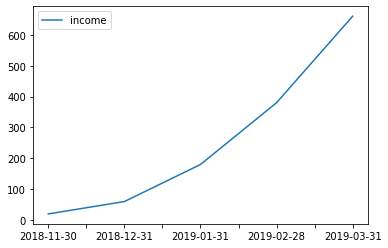

In [ ]:
df.plot()

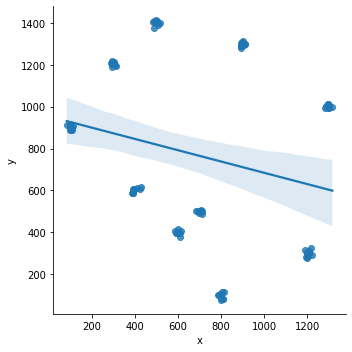

In [ ]:
from google.colab import files
clasters = pd.read_csv("dataset_209770_6(2).txt", sep=" ")
sns.lmplot(x='x', y='y', data=clasters)

In [ ]:
genom_dist = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
genom_dist.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


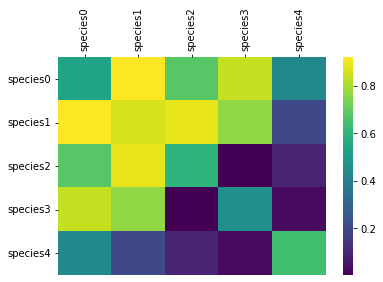

In [ ]:
g = sns.heatmap(data=genom_dist, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [ ]:
dota_heroes = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
dota_heroes.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


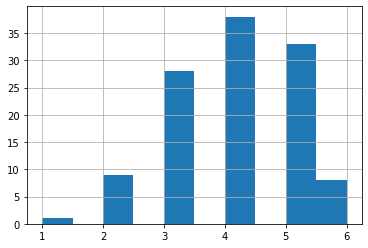

In [ ]:
dota_heroes['roles_count'] = dota_heroes.roles.str.count(',') + 1
dota_heroes.head()
dota_heroes.roles_count.hist()

In [ ]:
my_stat = pd.DataFrame(
                        [[np.nan, "A", np.nan, 0],
                        [3, "B", np.nan, 1],
                        [np.nan, "C", np.nan, -1],
                        [np.nan, "D", np.nan, 4]],
                        columns=["session_value", "group", "time", "n_users"]
                       )

my_stat = my_stat.fillna(0)
my_stat.head()

,session_value,group,time,n_users
0,0.0,A,0.0,0
1,3.0,B,0.0,1
2,0.0,C,0.0,-1
3,0.0,D,0.0,4


In [ ]:
nan = np.nan
m = my_stat.query("n_users > 0 & n_users != @nan").n_users.median()

my_stat.loc[my_stat.n_users < 0, 'n_users'] = m
my_stat.head()

,session_value,group,time,n_users
0,0.0,A,0.0,0.0
1,3.0,B,0.0,1.0
2,0.0,C,0.0,2.5
3,0.0,D,0.0,4.0


In [ ]:
mean_session_value_data = my_stat.groupby('group', as_index=False).session_value.mean().rename(columns={"session_value": "mean_session_value"})
mean_session_value_data.head()

,group,mean_session_value
0,A,0.0
1,B,3.0
2,C,0.0
3,D,0.0


In [3]:
crimes = pd.read_csv('https://stepik.org/media/attachments/lesson/24473/Crimes.csv')
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code
0,2383135,HH684629,10/01/2002 12:47:08 PM,032XX W ROOSEVELT RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,1134,11.0,24.0,29.0,06
1,2383437,HH693227,09/04/2002 09:30:00 PM,048XX W ARMITAGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,TAVERN/LIQUOR STORE,False,True,2522,25.0,31.0,19.0,08B
2,2383482,HH692935,10/04/2002 10:09:09 PM,116XX S MICHIGAN AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,532,5.0,9.0,53.0,26
3,2383568,HH690681,10/03/2002 05:00:00 AM,017XX W TOUHY AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,2423,24.0,49.0,1.0,05
4,2457967,HH706178,10/11/2002 12:28:49 AM,023XX E 79TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,False,414,4.0,7.0,43.0,08B


In [24]:
crimes['strdate'] = str(crimes.Date)

In [25]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,strdate
0,2383135,HH684629,10/01/2002 12:47:08 PM,032XX W ROOSEVELT RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,1134,11.0,24.0,29.0,06,0 10/01/2002 12:47:08 PM\n1 09/0...
1,2383437,HH693227,09/04/2002 09:30:00 PM,048XX W ARMITAGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,TAVERN/LIQUOR STORE,False,True,2522,25.0,31.0,19.0,08B,0 10/01/2002 12:47:08 PM\n1 09/0...
2,2383482,HH692935,10/04/2002 10:09:09 PM,116XX S MICHIGAN AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,532,5.0,9.0,53.0,26,0 10/01/2002 12:47:08 PM\n1 09/0...
3,2383568,HH690681,10/03/2002 05:00:00 AM,017XX W TOUHY AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,2423,24.0,49.0,1.0,05,0 10/01/2002 12:47:08 PM\n1 09/0...
4,2457967,HH706178,10/11/2002 12:28:49 AM,023XX E 79TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,False,414,4.0,7.0,43.0,08B,0 10/01/2002 12:47:08 PM\n1 09/0...


In [32]:
crimes.groupby('Primary Type').count()

,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,strdate
Primary Type,,,,,,,,,,,,,,,
ARSON,99,99,99,99,99,99,99,99,99,99,99,86,86,99,99
ASSAULT,3686,3686,3686,3686,3686,3686,3686,3686,3686,3686,3685,3267,3266,3686,3686
BATTERY,10892,10892,10892,10892,10892,10892,10892,10892,10892,10892,10892,9701,9700,10892,10892
BURGLARY,3566,3566,3566,3566,3566,3566,3566,3566,3566,3566,3566,3230,3230,3566,3566
CRIM SEXUAL ASSAULT,229,229,229,229,229,229,229,229,229,229,229,203,202,229,229
CRIMINAL DAMAGE,6989,6989,6989,6989,6989,6989,6989,6989,6989,6989,6989,6273,6269,6989,6989
CRIMINAL TRESPASS,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1598,1598,1754,1754
DECEPTIVE PRACTICE,2053,2053,2053,2053,2053,2053,2049,2053,2053,2053,2053,1913,1913,2053,2053
GAMBLING,110,110,110,110,110,110,110,110,110,110,110,107,107,110,110
